#Exploratory Data Analysis on Job Sites

## **Importing libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import statistics
!pip install folium
import folium
from folium import plugins
import plotly.express as px
gapminder = px.data.gapminder()
from pandas.plotting import scatter_matrix

import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode

# **Importing Datasets**

In [ ]:
#import data set
indeed = pd.read_csv('https://storage.googleapis.com/dse_project_final/indeed.csv')
simply=pd.read_csv('https://storage.googleapis.com/dse_project_final/Simplyhire.csv')
monster=pd.read_csv('https://storage.googleapis.com/hb1965/monster_data2.csv')
alldata=pd.read_csv('https://storage.googleapis.com/dse_project_final/alldata.csv')
city=pd.read_csv('https://storage.googleapis.com/dse_project_final/Cities_data.csv')
state = pd.read_csv('https://storage.googleapis.com/dse_project_final/State_data.csv')

In [ ]:
indeed.shape

(5715, 38)

In [ ]:
simply.shape

(575, 5)

In [ ]:
monster.shape

(253, 3)

In [ ]:
alldata.shape

(6952, 4)

In [ ]:
indeed.head(5)

,Job_Title,Queried_Salary,Job_Type,Company,No_of_Reviews,No_of_Stars,Date_Since_Posted,Location,Company_Revenue,Company_Employees,Company_Industry,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries,No_of_Skills,Skill 1,Skill2,Skill3,Skill4,Skill5,Skill6,Skill7,Skill8,Skill9,Skill10,Skill11,Skill12,Skill13,Skill14,Skill15,Skill16,Skill17,Skill18,Skill19,Skill20
0,Data Scientist,<80000,data_scientist,Express Scripts,3301.0,3.3,1.0,MO,More than $10B (USD),"10,000+",Health Care,0,0,0,1,0,0,2,SAP,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Data Scientist,<80000,data_scientist,Money Mart Financial Services,NaN,NaN,15.0,TX,NaN,NaN,NaN,0,0,0,0,0,0,5,Machine Learning,R,SAS,SQL,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Data Scientist,<80000,data_scientist,comScore,62.0,3.5,1.0,OR,NaN,NaN,NaN,0,0,0,0,0,0,9,Data Mining,Data Management,R,SAS,SQL,STATA,SPSS,Data Analysis,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Graduate Studies Program - Data Scientist,<80000,data_scientist,Central Intelligence Agency,158.0,4.3,30.0,DC,NaN,NaN,Government,0,0,0,0,0,1,1,Certified Internal Auditor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Data Scientist I,<80000,data_scientist,Federal Reserve Bank of Dallas,495.0,4.1,30.0,TX,NaN,"Less than 10,000",Banks and Financial Services,0,0,1,0,0,0,7,Statistical Software,Time Management,R,Microsoft Office,Excel,Tableau,Data Science,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Data Cleaning**

1. Removing spaces from column names and replacing them with '_'



In [ ]:
indeed.columns = indeed.columns.str.replace(' ', '_')
indeed.head()

,Job_Title,Queried_Salary,Job_Type,Company,No_of_Reviews,No_of_Stars,Date_Since_Posted,Location,Company_Revenue,Company_Employees,Company_Industry,Consulting_and_Business_Services,Internet_and_Software,Banks_and_Financial_Services,Health_Care,Insurance,Other_industries,No_of_Skills,Skill_1,Skill2,Skill3,Skill4,Skill5,Skill6,Skill7,Skill8,Skill9,Skill10,Skill11,Skill12,Skill13,Skill14,Skill15,Skill16,Skill17,Skill18,Skill19,Skill20
0,Data Scientist,<80000,data_scientist,Express Scripts,3301.0,3.3,1.0,MO,More than $10B (USD),"10,000+",Health Care,0,0,0,1,0,0,2,SAP,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Data Scientist,<80000,data_scientist,Money Mart Financial Services,NaN,NaN,15.0,TX,NaN,NaN,NaN,0,0,0,0,0,0,5,Machine Learning,R,SAS,SQL,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Data Scientist,<80000,data_scientist,comScore,62.0,3.5,1.0,OR,NaN,NaN,NaN,0,0,0,0,0,0,9,Data Mining,Data Management,R,SAS,SQL,STATA,SPSS,Data Analysis,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Graduate Studies Program - Data Scientist,<80000,data_scientist,Central Intelligence Agency,158.0,4.3,30.0,DC,NaN,NaN,Government,0,0,0,0,0,1,1,Certified Internal Auditor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Data Scientist I,<80000,data_scientist,Federal Reserve Bank of Dallas,495.0,4.1,30.0,TX,NaN,"Less than 10,000",Banks and Financial Services,0,0,1,0,0,0,7,Statistical Software,Time Management,R,Microsoft Office,Excel,Tableau,Data Science,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


2. Changing the index to start from 1 instead of zero.
3. Some values in location are 'USA' which doesnt make meaning to other location so removing such values.
4. To avoid repetition in values changing some column values to lowercase. 
5. Dropping columns which are not useful for our analysis.

In [ ]:
indeed.index = np.arange(1,len(indeed)+1)
indeed = indeed[(indeed.Location) != 'USA']
indeed.Job_Title=indeed['Job_Title'].str.lower()
indeed.Company= indeed['Company'].str.lower()
indeed.drop(['Consulting_and_Business_Services','Internet_and_Software',"Banks_and_Financial_Services","Health_Care"] , axis=1 , inplace=True)
indeed.head()

,Job_Title,Queried_Salary,Job_Type,Company,No_of_Reviews,No_of_Stars,Date_Since_Posted,Location,Company_Revenue,Company_Employees,Company_Industry,Insurance,Other_industries,No_of_Skills,Skill_1,Skill2,Skill3,Skill4,Skill5,Skill6,Skill7,Skill8,Skill9,Skill10,Skill11,Skill12,Skill13,Skill14,Skill15,Skill16,Skill17,Skill18,Skill19,Skill20
1,data scientist,<80000,data_scientist,express scripts,3301.0,3.3,1.0,MO,More than $10B (USD),"10,000+",Health Care,0,0,2,SAP,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,data scientist,<80000,data_scientist,money mart financial services,NaN,NaN,15.0,TX,NaN,NaN,NaN,0,0,5,Machine Learning,R,SAS,SQL,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,data scientist,<80000,data_scientist,comscore,62.0,3.5,1.0,OR,NaN,NaN,NaN,0,0,9,Data Mining,Data Management,R,SAS,SQL,STATA,SPSS,Data Analysis,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,graduate studies program - data scientist,<80000,data_scientist,central intelligence agency,158.0,4.3,30.0,DC,NaN,NaN,Government,0,1,1,Certified Internal Auditor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,data scientist i,<80000,data_scientist,federal reserve bank of dallas,495.0,4.1,30.0,TX,NaN,"Less than 10,000",Banks and Financial Services,0,0,7,Statistical Software,Time Management,R,Microsoft Office,Excel,Tableau,Data Science,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
monster.head()

,jobtitle,company,location
0,Data Scientist/Principal Data Scientist,Northrop Grumman,"Rolling Meadows, IL"
1,Data Scientist,LRS,"Maryland Heights, MO"
2,LEAD DATA SCIENTIST,CenturyLink,"BROOMFIELD, CO"
3,Principal Data Scientist/Modeler,Exelon Corporation,"BALTIMORE, MD"
4,Data Scientist,Eaton Corporation,"Eden Prairie, MN"


In [ ]:
monster.jobtitle= monster['jobtitle'].str.lower()
monster.company = monster['company'].str.lower()
monster.location = monster['location'].str.lower()
monster.head()

,jobtitle,company,location
0,data scientist/principal data scientist,northrop grumman,"rolling meadows, il"
1,data scientist,lrs,"maryland heights, mo"
2,lead data scientist,centurylink,"broomfield, co"
3,principal data scientist/modeler,exelon corporation,"baltimore, md"
4,data scientist,eaton corporation,"eden prairie, mn"


In [ ]:
monster.index = np.arange(1,len(monster)+1)
monster.head()

,jobtitle,company,location
1,data scientist/principal data scientist,northrop grumman,"rolling meadows, il"
2,data scientist,lrs,"maryland heights, mo"
3,lead data scientist,centurylink,"broomfield, co"
4,principal data scientist/modeler,exelon corporation,"baltimore, md"
5,data scientist,eaton corporation,"eden prairie, mn"


In [ ]:
simply.head(15)

,job_title,Location,Salary Low,Salary High,Average Salary
0,Entry Level Federal Associate Data Science,DC,NaN,NaN,NaN
1,Sr. Data Engineer-Analytics,MA,130000.0,170000.0,150000.0
2,Product Manager - Spatial Analytics & Data Sci...,CA,82000.0,110000.0,96000.0
3,SharePoint Data Migration Engineer - US Citize...,DC,78000.0,110000.0,94000.0
4,"Head of Data Science, Search",MA,74000.0,100000.0,87000.0
5,Data Science Manager,CA,100000.0,140000.0,120000.0
6,Lead Software Engineer Data / Analytics,CA,130000.0,160000.0,145000.0
7,FDA Data Science and Visual Analytics Fellowship,MD,86000.0,120000.0,103000.0
8,Data Science Software Engineer - Entry Level,OH,70000.0,100000.0,85000.0
9,"Intern, Data Science",IL,73000.0,99000.0,86000.0


In [ ]:
simply.index = np.arange(1,len(simply)+1)
simply.head()

,job_title,Location,Salary Low,Salary High,Average Salary
1,Entry Level Federal Associate Data Science,DC,NaN,NaN,NaN
2,Sr. Data Engineer-Analytics,MA,130000.0,170000.0,150000.0
3,Product Manager - Spatial Analytics & Data Sci...,CA,82000.0,110000.0,96000.0
4,SharePoint Data Migration Engineer - US Citize...,DC,78000.0,110000.0,94000.0
5,"Head of Data Science, Search",MA,74000.0,100000.0,87000.0


6. Replacing all spaces with '_'.

In [ ]:
simply.columns = simply.columns.str.replace(' ', '_')
simply.head()

,job_title,Location,Salary_Low,Salary_High,Average_Salary
1,Entry Level Federal Associate Data Science,DC,NaN,NaN,NaN
2,Sr. Data Engineer-Analytics,MA,130000.0,170000.0,150000.0
3,Product Manager - Spatial Analytics & Data Sci...,CA,82000.0,110000.0,96000.0
4,SharePoint Data Migration Engineer - US Citize...,DC,78000.0,110000.0,94000.0
5,"Head of Data Science, Search",MA,74000.0,100000.0,87000.0


...continuing data cleaning on the next dataset.

In [ ]:
state.index = np.arange(1,len(state)+1)

city.index = np.arange(1,len(city)+1)
simply.columns = simply.columns.str.replace(' ', '_')
simply.index = np.arange(1,len(simply)+1)

# **EDA on Job Sites**

In [ ]:
indeed['Job_Type'].value_counts()

data_scientist    2504
data_analyst      1769
data_engineer     1371
Name: Job_Type, dtype: int64

**Assumption:** As the above cell shows, we now know that Data Scientist Jobs are high in number.

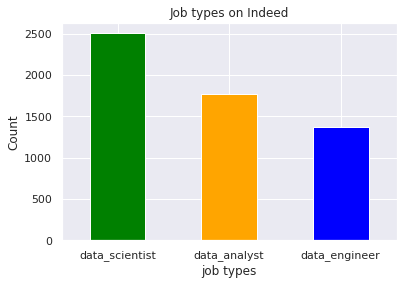

In [ ]:
Result_Bar = indeed['Job_Type'].value_counts().plot.bar(color=['green', 'orange', 'blue'],title = 'Job types on Indeed')
Result_Bar.set_xlabel("job types")
Result_Bar.set_ylabel("Count")
Result_Bar.tick_params(labelrotation=360)

As this graph shows, Data Scientist has the highest number of postings on Indeed. Followed by Data Analyst.

In [ ]:
monster['jobtitle'].value_counts()

data scientist                                           70
senior data scientist                                    10
sr. data scientist                                        9
data scientists                                           6
principal data scientist                                  5
                                                         ..
data scientist and designer                               1
mopar data scientist                                      1
data scientist / manufacturing data (pharma industry)     1
sr data warehouse developer - bethpage, ny                1
delivery manager                                          1
Name: jobtitle, Length: 141, dtype: int64

In [ ]:
simply['job_title'].value_counts()

Data Scientist                               147
Data Engineer                                 20
Data Science Intern                           16
Lead Data Scientist                            6
Data Warehouse Engineer                        6
                                            ... 
Software Engineer - Data Science               1
Lead Data Scientist IV, Central Analytics      1
IoT Data Scientist                             1
Machine Learning Engineer                      1
Data Scientist - Market Research               1
Name: job_title, Length: 255, dtype: int64

The pie chart and the value_count() was used to show the split of postings of job types on Indeed, monster and Simply and we can see that Data Scientist ranks 1st.
****


**Assumption:** According to our previous bar graph, we are assuming that Data Scientist will be the largest slice of the pie graph.

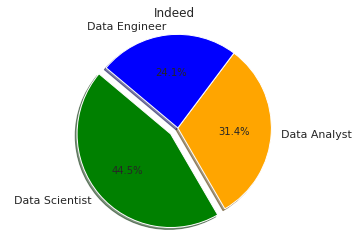

In [ ]:
labels = 'Data Scientist', 'Data Analyst', 'Data Engineer'
sizes = [2543,1793,1379]
colors = ['green', 'orange', 'blue']
explode = (0.1, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Indeed')
plt.show()

As this pie graph shows, Data Scientist holds 44.5% of the postings on Indeed.




In [ ]:
ds= monster['jobtitle'].str.contains('scientist').value_counts()
de= monster['jobtitle'].str.contains('engineer').value_counts()
da=monster['jobtitle'].str.contains('analyst').value_counts()


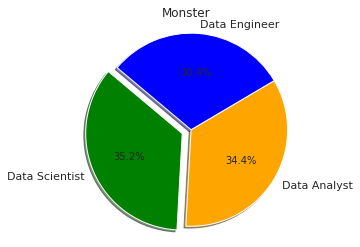

In [ ]:
monstersize = [240,234,207]
colors = ['green', 'orange', 'blue']
explode = (0.1, 0, 0)  # explode 1st slice

# Plot
plt.pie(monstersize, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Monster')
plt.show()

As this pie graph shows, Data Scientist holds 35.2% of the postings on Monster.

In [ ]:
simplyds= simply['job_title'].str.contains('Scientist').value_counts()
simplyde= simply['job_title'].str.contains('Engineer').value_counts()
simplyda=simply['job_title'].str.contains('Analyst').value_counts()

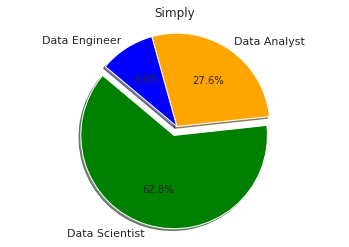

In [ ]:
simplysize = [289,127,44]
colors = ['green', 'orange', 'blue']
explode = (0.1, 0, 0)  # explode 1st slice

# Plot
plt.pie(simplysize, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Simply')
plt.show()

As this pie graph shows, Data Scientist holds 62.8% of the postings on Simply.

# **Locations: where the jobs are listed**

**Assumption:** Every state would hire Data Scientists.

In [ ]:
state.index = np.arange(1,len(state)+1)

In [ ]:
city.index = np.arange(1,len(city)+1)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text xticklabel objects>)

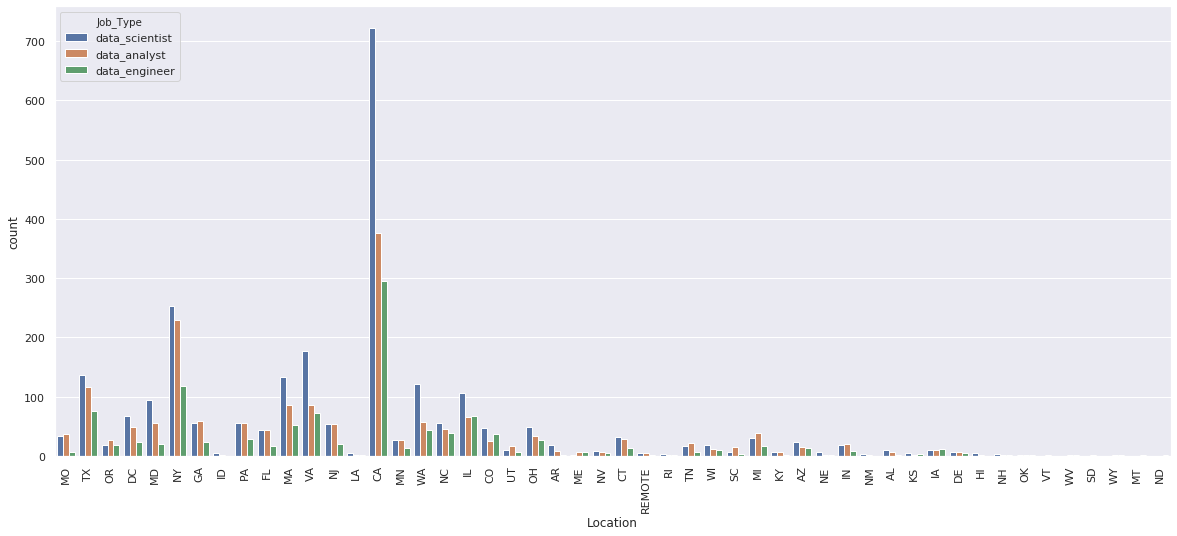

In [ ]:
sns.set(rc={'figure.figsize':(20,8.27)})
ax = sns.countplot(x="Location", hue="Job_Type", data=indeed)
plt.xticks(rotation=90)

As this graph shows, all states are hiring.

Text(0, 0.5, 'Count')

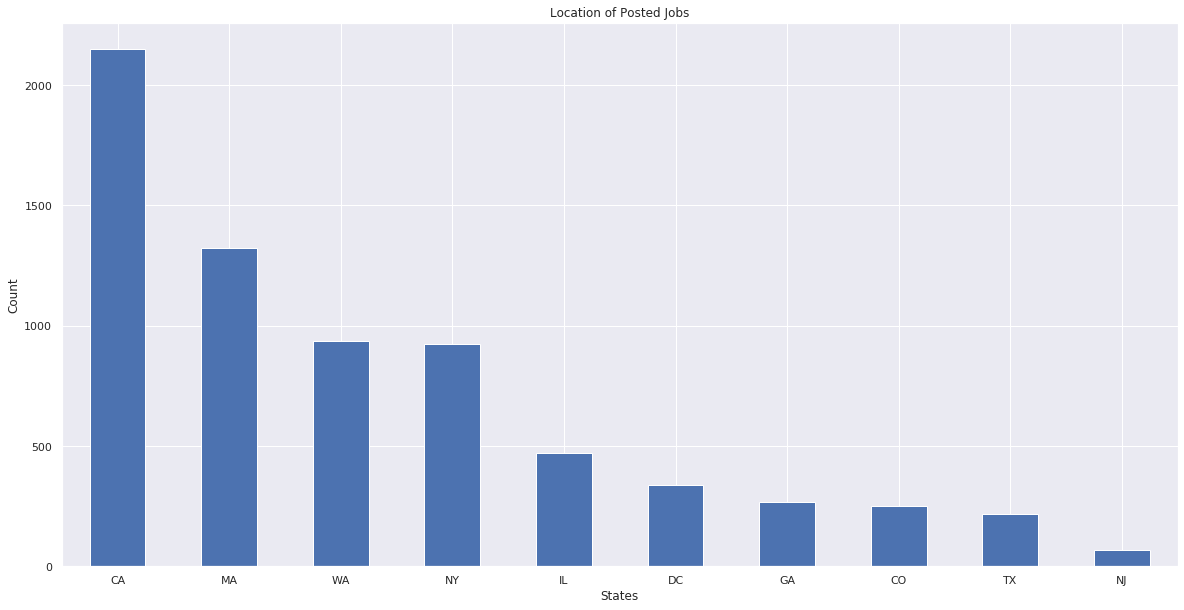

In [ ]:
plt.rcParams["figure.figsize"] = [20,10]

Result_Bar1 = state['State'].value_counts()[:10].plot.bar(title = 'Location of Posted Jobs')
Result_Bar1.tick_params(labelrotation=360)
Result_Bar1.set_xlabel("States")
Result_Bar1.set_ylabel("Count")






This bar graph shows the top 10 states and ranks which state has the highest Data Scientiest posts. As we can see California has the highest job postings.

We now will break this down to a City level.

---


**Assumption:** Since there are jobs in the top ten states, there should be jobs in the corresponding cities.

Text(0, 0.5, 'Count')

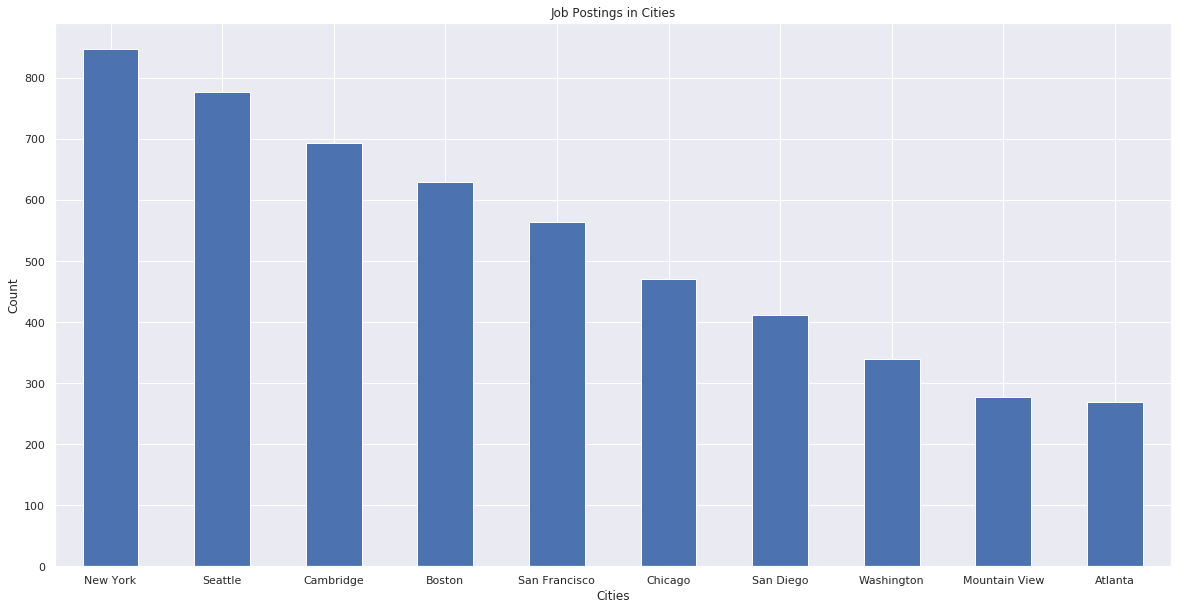

In [ ]:
plt.rcParams["figure.figsize"] = [20,10]

Result_Bar2 = city['city'].value_counts()[:10].plot.bar(title = 'Job Postings in Cities')
Result_Bar2.tick_params(labelrotation=360)
Result_Bar2.set_xlabel("Cities")
Result_Bar2.set_ylabel("Count")

When looking for the cities being ranked, it shows a bit of a difference compared to states graph. With the different data sets, it seems that certain websites cater to certain parts of the US.

---
Now we are going to break down by top 5 states to take a closer look at salaries.

**Assumption:** We assume the higher the number of job posts, the higher the salary.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



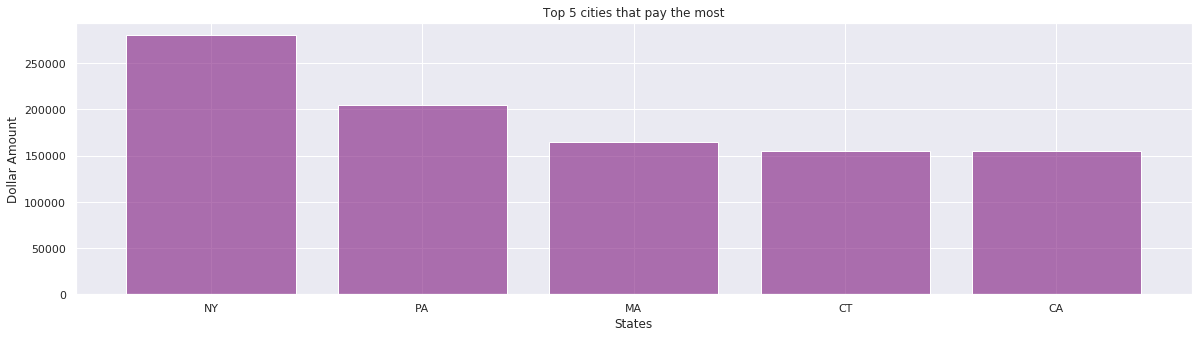

In [ ]:
simply_salary=simply[["Location","Average_Salary"]]
simply_salary.sort_values(["Average_Salary"], axis=0, ascending=False, inplace=True) 

plt.rcParams["figure.figsize"] = [20,5]

#  dataset
height = [280000, 205000, 165000, 155000, 155000]
bars = ('NY', 'PA', 'MA', 'CT', 'CA')
y_pos = np.arange(len(bars))
 
# Create bars and choose color
plt.bar(y_pos, height, color = (0.5,0.1,0.5,0.6))
 
# Add title and axis names
plt.title('Top 5 cities that pay the most')
plt.xlabel('States')
plt.ylabel('Dollar Amount')
 
# Create names & color
plt.xticks(y_pos, bars)
 
# Show graphic
plt.show()


As this graph shows, the top 5 states that have the highest salaries somewhat correspond to the highest number of job positings.


---
To continue our analysis of salary, we wanted to see how big the different of lowest versus highest salary was.

**Assumption:** Because there must be so many outliers in salary amount, the difference in salaries offered should be very large.


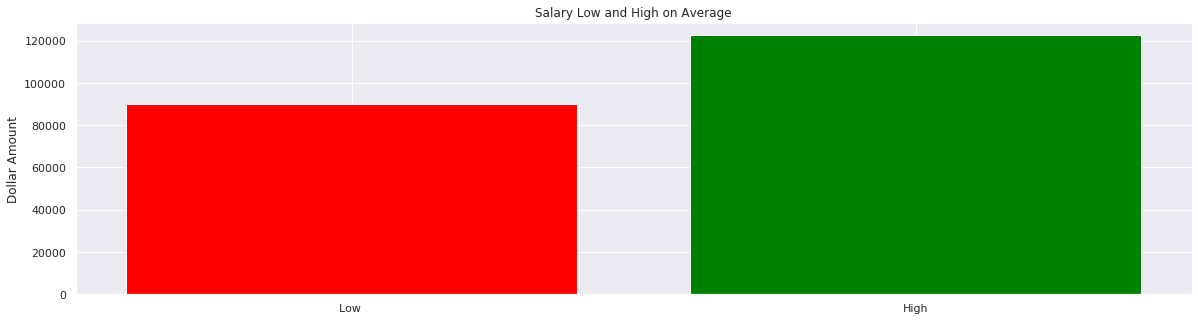

In [ ]:
plt.rcParams["figure.figsize"] = [20,5]

x=simply['Salary_Low'].mean()
y=simply['Salary_High'].mean()
height = [x,y]
bars = ('Low ', 'High')
y_pos = np.arange(len(bars))
plt.bar(y_pos, height,color=['red', 'green'])
plt.xticks(y_pos, bars)

plt.ylabel('Dollar Amount')
plt.title('Salary Low and High on Average')

plt.show()




This graph shows that our assumption is correct. The lowest salary offered is about 90,000 dollars and the highest salary offered is over 120,000 dollars.

---

The next graph shows the average salary offered throughout our data.

**Assumption:** The average salary should be between 90,000-120,000 dollars.

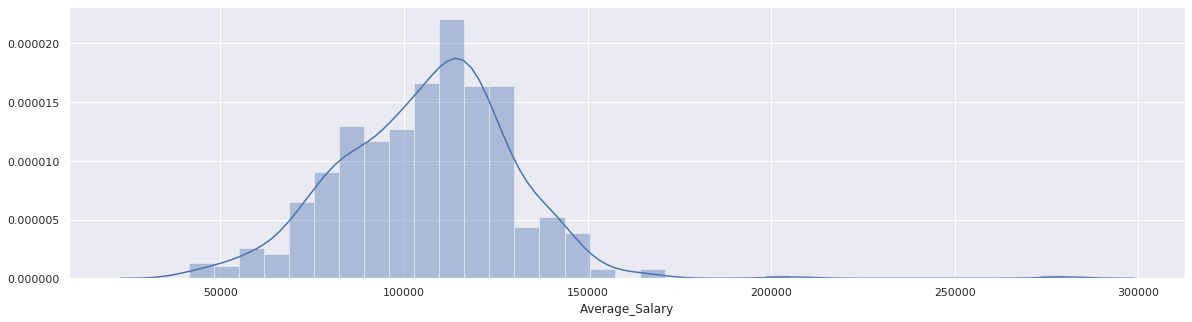

In [ ]:
sns.distplot( simply["Average_Salary"].dropna())



According to our graph, we are correct with our assumption. The average salary for this dataset is right around $120,000.

---
The box plot shows the lowest, highest and average salary being offered.

**Assumption:** The average salary should be right around $120,000.


Text(0.5, 1.0, 'Box Plot of Salary low, high, average')

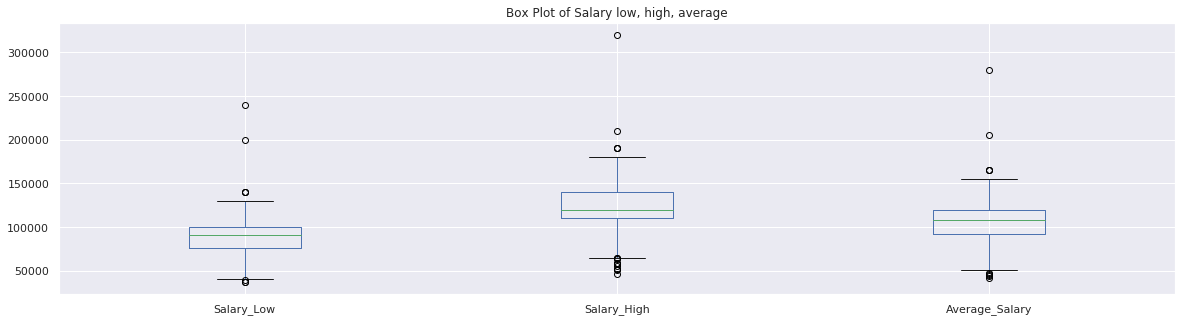

In [ ]:
simply_salary=simply[['Salary_Low', 'Salary_High','Average_Salary']]
simply_salary.plot.box()
plt.title('Box Plot of Salary low, high, average')



Once again, our assumptions about the average salary amount being offered was correct. This graph does a great job showing the differences and outliers. 

---
The next graph shows the ratings of the companies posting job requirements.

**Assumption:** The higher stars, the more reviews will be present.


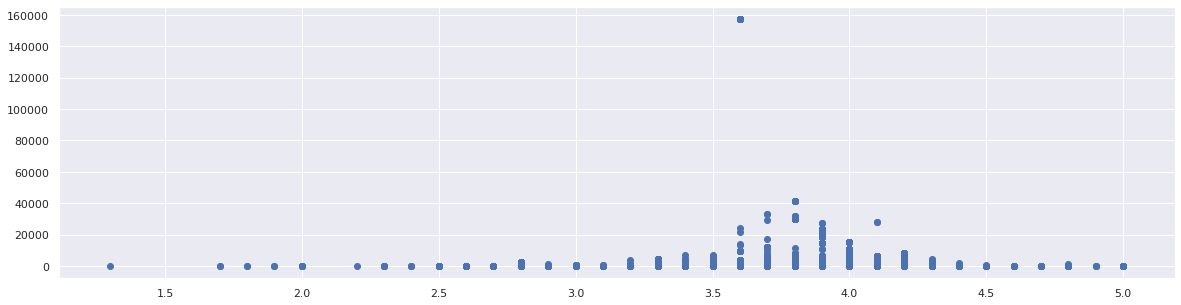

In [ ]:
plt.scatter(indeed['No_of_Stars'],indeed['No_of_Reviews']) 
plt.show() 

As the scatter plot shows, the highest amount of reviews are written only for ratings of 3.5 - 4.2. This seems ironic compared to what our assumption was.

---
We now will dive into the most common skills asked for.

**Assumption:** Data Science mainly asks for Machine Learning.


In [ ]:
indeed['Skill_1'].value_counts()

Machine Learning       523
TensorFlow             418
Data Mining            405
Hive                   367
Pig                    300
                      ... 
Sentiment Analytics      1
HTML5                    1
B2B Sales                1
MicroStation             1
SEO                      1
Name: Skill_1, Length: 220, dtype: int64

how frequenty Python, Machine learning, hadoop and R are asked as skill sets.

In [ ]:
indeed['python']=indeed['Skill_1'].str.contains('Python') | indeed['Skill2'].str.contains('Python') | indeed['Skill3'].str.contains('Python') | indeed['Skill4'].str.contains('Python') | indeed['Skill5'].str.contains('Python') | indeed['Skill6'].str.contains('Python') | indeed['Skill7'].str.contains('Python') | indeed['Skill8'].str.contains('Python') | indeed['Skill9'].str.contains('Python') | indeed['Skill10'].str.contains('Python') | indeed['Skill11'].str.contains('Python') | indeed['Skill12'].str.contains('Python') | indeed['Skill13'].str.contains('Python') | indeed['Skill14'].str.contains('Python') | indeed['Skill15'].str.contains('Python') | indeed['Skill16'].str.contains('Python') | indeed['Skill17'].str.contains('Python') | indeed['Skill18'].str.contains('Python') | indeed['Skill19'].str.contains('Python')|indeed['Skill19'].str.contains('Python')
indeed['ml']=indeed['Skill_1'].str.contains('Machine Learning') | indeed['Skill2'].str.contains('Machine Learning') | indeed['Skill3'].str.contains('Machine Learning') | indeed['Skill4'].str.contains('Machine Learning') | indeed['Skill5'].str.contains('Machine Learning') | indeed['Skill6'].str.contains('Machine Learning') | indeed['Skill7'].str.contains('Machine Learning') | indeed['Skill8'].str.contains('Machine Learning') | indeed['Skill9'].str.contains('Machine Learning') | indeed['Skill10'].str.contains('Machine Learning') | indeed['Skill11'].str.contains('Machine Learning') | indeed['Skill12'].str.contains('Machine Learning') | indeed['Skill13'].str.contains('Machine Learning') | indeed['Skill14'].str.contains('Machine Learning') | indeed['Skill15'].str.contains('Machine Learning') | indeed['Skill16'].str.contains('Machine Learning') | indeed['Skill17'].str.contains('Machine Learning') | indeed['Skill18'].str.contains('Machine Learning') | indeed['Skill19'].str.contains('Machine Learning')|indeed['Skill19'].str.contains('Machine Learning')
indeed['Hadoop']=indeed['Skill_1'].str.contains('Hadoop') | indeed['Skill2'].str.contains('Hadoop') | indeed['Skill3'].str.contains('Hadoop') | indeed['Skill4'].str.contains('Hadoop') | indeed['Skill5'].str.contains('Hadoop') | indeed['Skill6'].str.contains('Hadoop') | indeed['Skill7'].str.contains('Hadoop') | indeed['Skill8'].str.contains('Hadoop') | indeed['Skill9'].str.contains('Hadoop') | indeed['Skill10'].str.contains('Hadoop') | indeed['Skill11'].str.contains('Hadoop') | indeed['Skill12'].str.contains('Hadoop') | indeed['Skill13'].str.contains('Hadoop') | indeed['Skill14'].str.contains('Hadoop') | indeed['Skill15'].str.contains('Hadoop') | indeed['Skill16'].str.contains('Hadoop') | indeed['Skill17'].str.contains('Hadoop') | indeed['Skill18'].str.contains('Hadoop') | indeed['Skill19'].str.contains('Hadoop')|indeed['Skill19'].str.contains('Hadoop')
indeed['R']=indeed['Skill_1'].str.contains('R') | indeed['Skill2'].str.contains('R') | indeed['Skill3'].str.contains('R') | indeed['Skill4'].str.contains('R') | indeed['Skill5'].str.contains('R') | indeed['Skill6'].str.contains('R') | indeed['Skill7'].str.contains('R') | indeed['Skill8'].str.contains('R') | indeed['Skill9'].str.contains('R') | indeed['Skill10'].str.contains('R') | indeed['Skill11'].str.contains('R') | indeed['Skill12'].str.contains('R') | indeed['Skill13'].str.contains('R') | indeed['Skill14'].str.contains('R') | indeed['Skill15'].str.contains('R') | indeed['Skill16'].str.contains('R') | indeed['Skill17'].str.contains('R') | indeed['Skill18'].str.contains('R') | indeed['Skill19'].str.contains('R')|indeed['Skill19'].str.contains('R')
indeed.head()

,Job_Title,Queried_Salary,Job_Type,Company,No_of_Reviews,No_of_Stars,Date_Since_Posted,Location,Company_Revenue,Company_Employees,Company_Industry,Insurance,Other_industries,No_of_Skills,Skill_1,Skill2,Skill3,Skill4,Skill5,Skill6,Skill7,Skill8,Skill9,Skill10,Skill11,Skill12,Skill13,Skill14,Skill15,Skill16,Skill17,Skill18,Skill19,Skill20,python,ml,Hadoop,R
1,data scientist,<80000,data_scientist,express scripts,3301.0,3.3,1.0,MO,More than $10B (USD),"10,000+",Health Care,0,0,2,SAP,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
2,data scientist,<80000,data_scientist,money mart financial services,NaN,NaN,15.0,TX,NaN,NaN,NaN,0,0,5,Machine Learning,R,SAS,SQL,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,False,True
3,data scientist,<80000,data_scientist,comscore,62.0,3.5,1.0,OR,NaN,NaN,NaN,0,0,9,Data Mining,Data Management,R,SAS,SQL,STATA,SPSS,Data Analysis,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False,True
4,graduate studies program - data scientist,<80000,data_scientist,central intelligence agency,158.0,4.3,30.0,DC,NaN,NaN,Government,0,1,1,Certified Internal Auditor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
5,data scientist i,<80000,data_scientist,federal reserve bank of dallas,495.0,4.1,30.0,TX,NaN,"Less than 10,000",Banks and Financial Services,0,0,7,Statistical Software,Time Management,R,Microsoft Office,Excel,Tableau,Data Science,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,True


Counting in various skills.

In [ ]:
pythoncount=indeed.python.value_counts()
pythoncount

True     3254
False    2390
Name: python, dtype: int64

In [ ]:
mlcount=indeed.ml.value_counts()
mlcount

False    3377
True     2267
Name: ml, dtype: int64

In [ ]:
hadoopcount=indeed.Hadoop.value_counts()
hadoopcount

False    3957
True     1687
Name: Hadoop, dtype: int64

In [ ]:
Rcount=indeed.R.value_counts()
Rcount

False    3071
True     2573
Name: R, dtype: int64

Creating subset for skillsets

In [ ]:
df = indeed[['ml', 'python', 'Hadoop','R']]

Skill set which is asked more frequenty

The next bar plot shows all skills that are present or not in the job posts.

**Assumption:** We assume Python to be listed in the yes column, with the most listings.

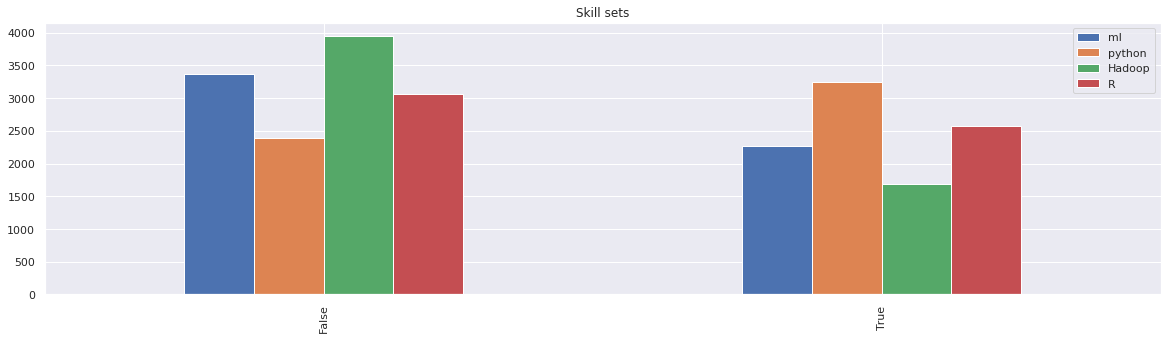

In [ ]:
df1 = df.apply(pd.value_counts)
df1.plot.bar(title="Skill sets")

Python is the skill set which is asked more Frequently.

---

The following graph is only for the asked skillset. 

**Assumption:** R should be asked the least amount.


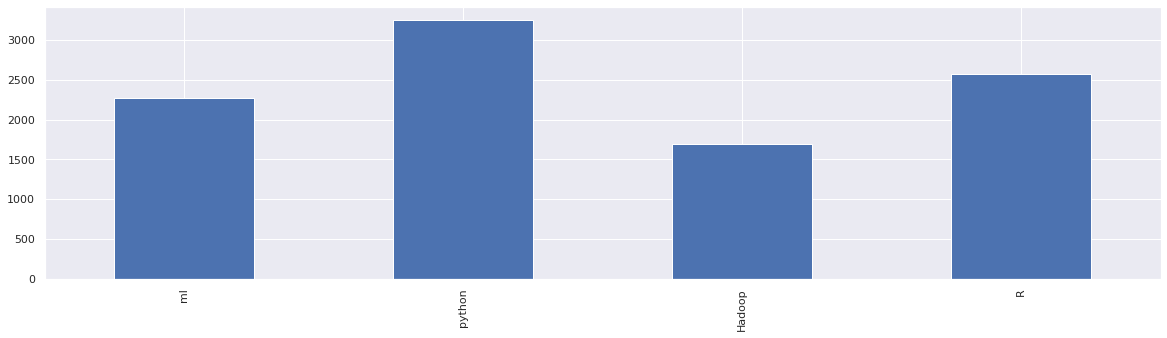

In [ ]:
df1.loc[True].plot.bar()

Companies asking python as skill set, the second most asked skillset is R.


---


This graph shows that python is not the only skillset always required.

**Assumption:** There are other skillsets required.


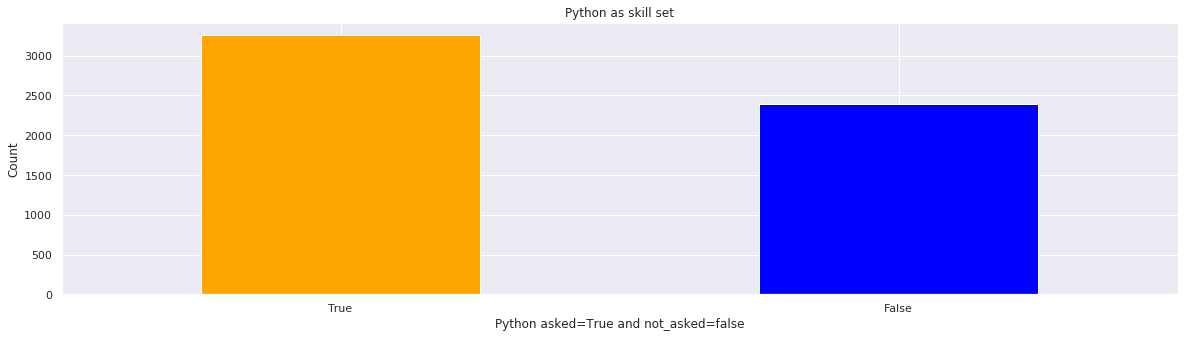

In [ ]:
Result_Bar = indeed['python'].value_counts().plot.bar(color=['orange', 'blue'],title = 'Python as skill set')
Result_Bar.set_xlabel("Python asked=True and not_asked=false")
Result_Bar.set_ylabel("Count")
Result_Bar.tick_params(labelrotation=360)

From above we can see that we can not totally rely on python so having other skiils with python is useful.

This graph shows the relation between salary and location.

**Assumption:** California has the highest salary, because previously California was one of the states with the most postings.


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text xticklabel objects>)

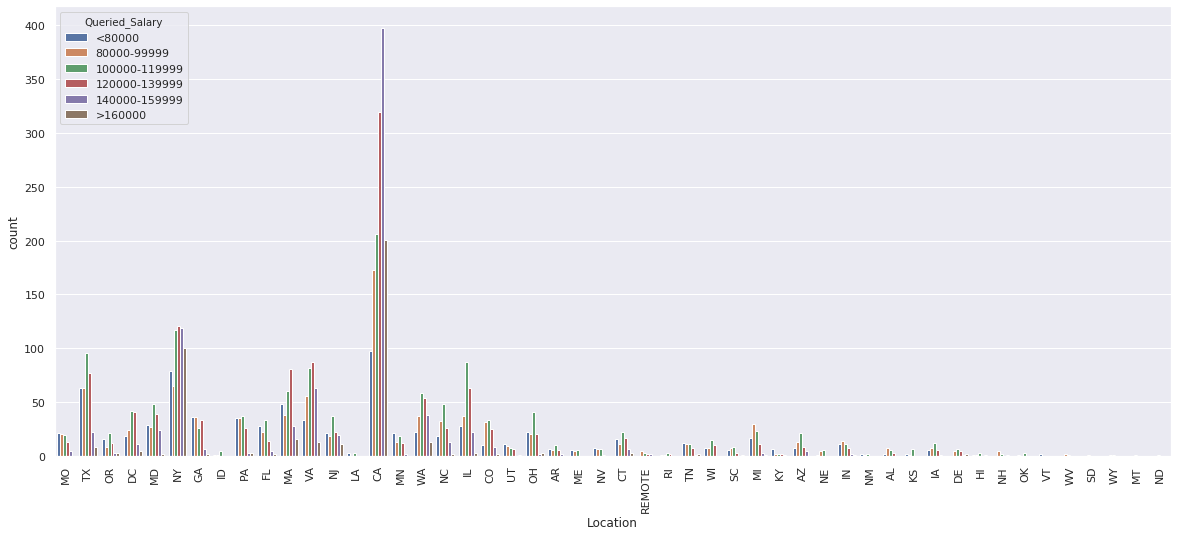

In [ ]:
sns.set(rc={'figure.figsize':(20,8.27)})
ax = sns.countplot(x="Location", hue="Queried_Salary", data=indeed)
plt.xticks(rotation=90)

From above we can see that California is offering more Salaries.

The next pie chart shows company revenue.

**Assumption:** We identify the market cap of those companies who hire data science jobs

In [ ]:
indeed['Company_Revenue'].value_counts()

More than $10B (USD)    1027
$5B to $10B (USD)        396
$1B to $5B (USD)         314
Less than $1B (USD)      262
Name: Company_Revenue, dtype: int64

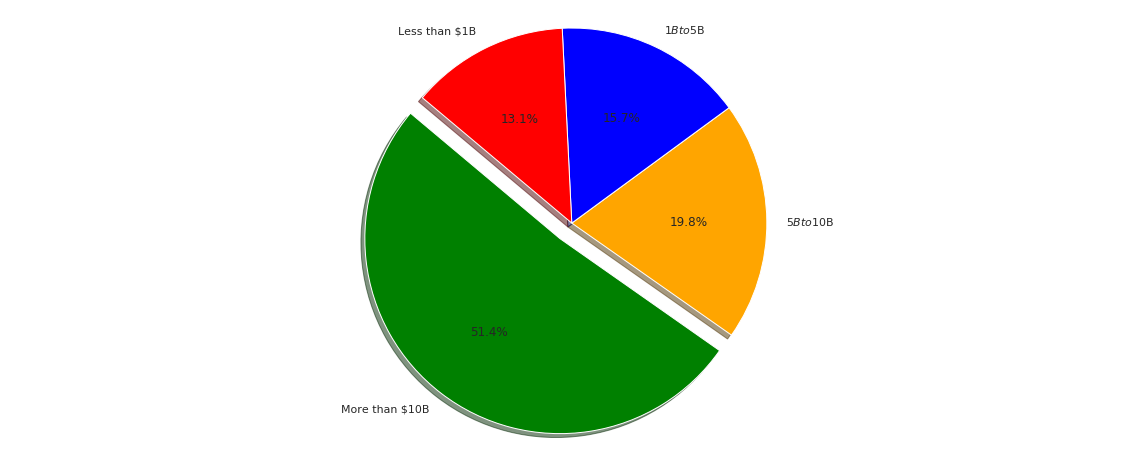

In [ ]:
labels = 'More than $10B', '$5B to $10B', '$1B to $5B','Less than $1B'
sizes = [1027,396,314,262]
colors = ['green', 'orange', 'blue','red']
explode = (0.1, 0, 0,0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

A lot of companies with big market cap hire for this job

Number of skills requirement for the jobs


**Assumption:** The more skills you have the higher the changes to land a job.

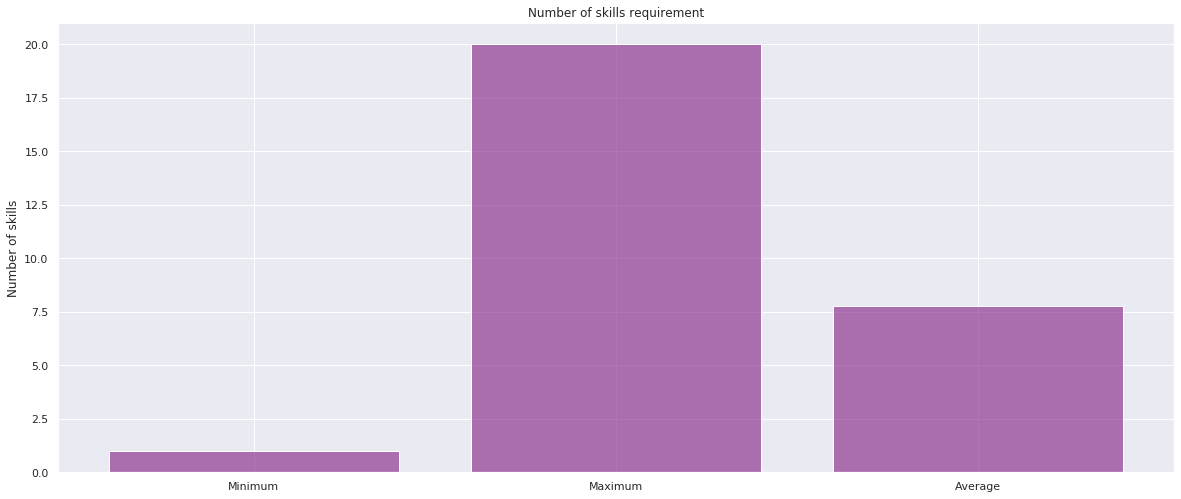

In [ ]:
height = [1,20,7.78]
bars = ('Minimum', 'Maximum', 'Average')
y_pos = np.arange(len(bars))
 
# Create bars and choose color
plt.bar(y_pos, height, color = (0.5,0.1,0.5,0.6))
 
# Add title and axis names
plt.title('Number of skills requirement')
plt.ylabel('Number of skills')
 
# Create names
plt.xticks(y_pos, bars)
 
# Show graphic
plt.show()


The assumption is correct. The maximum number of skills will provide the maximum number of requirements.


---

The next violin plot shows the number of skills versus the number of stars.

**Assumption:** The higher the number of skills, that job title has the highest number of stars.


Text(0.5, 1.0, 'Number of Stars vs. Number of Skills')

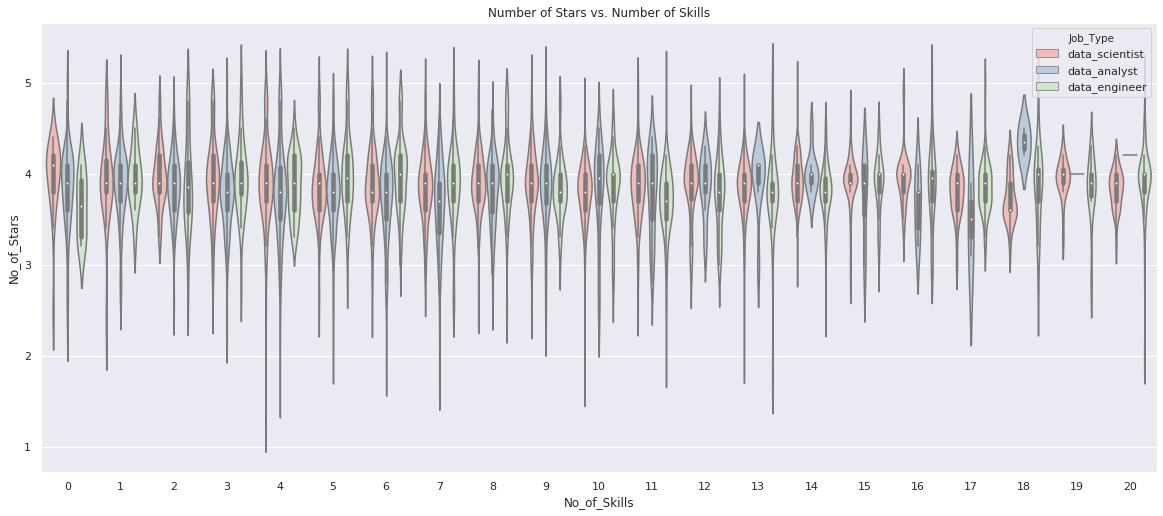

In [ ]:
ax = sns.violinplot(x="No_of_Skills", y="No_of_Stars", hue="Job_Type", title = "ddd", data=indeed, palette="Pastel1")
ax.set_title ("Number of Stars vs. Number of Skills")

Our assumption is correct, the job type witht the most skills has the highest number of stars.


---

**Assumption:** The higher the number of stars, the more the reviews.

Text(0.5, 1, 'Number of Reviews vs. Number of Stars')

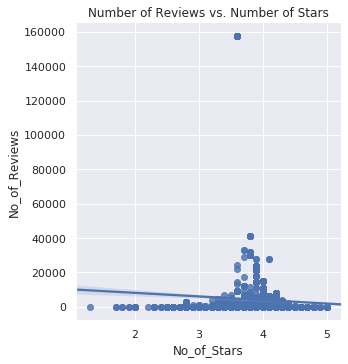

In [ ]:
sns.lmplot(x='No_of_Stars', y='No_of_Reviews', data=indeed)
plt.title("Number of Reviews vs. Number of Stars")

Our assumption was not correct, it seems that the number of reviews were highest between 3.5-4.5 stars.


---

**Assumption:** This plot randomly placed the location and job title. If the name was written in title, the plot shows it placed close.



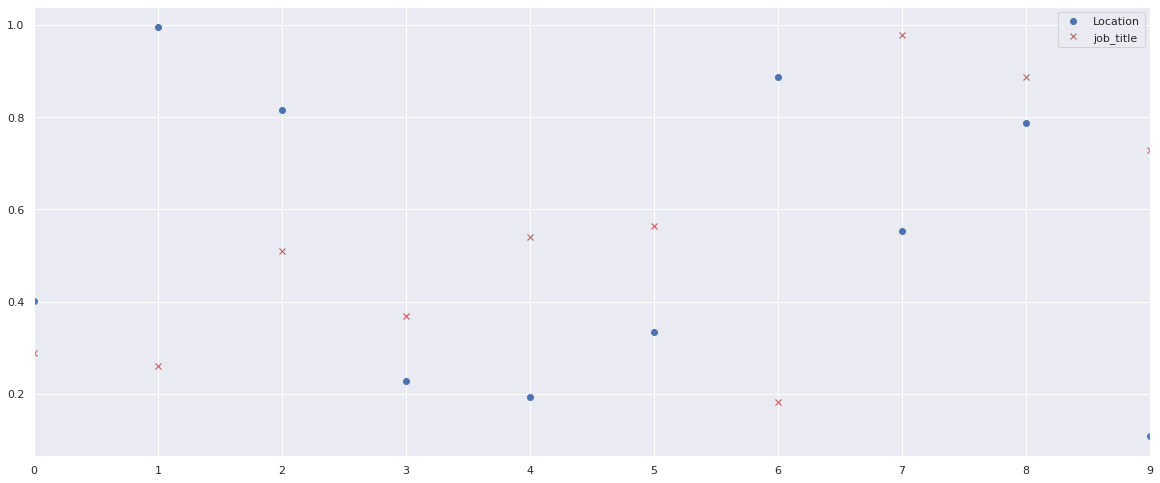

In [ ]:
d = {'Location' : np.random.rand(10), 
     'job_title' : np.random.rand(10)}

df = pd.DataFrame(d)

df.plot(style=['o','rx'])

Our assumption was correct. The plots are shown closer.


---

# SQL Queries


In [ ]:
%%bash
apt-get install openjdk-8-jdk-headless -qq > /dev/null
[ ! -e "$(basename spark-2.4.4-bin-hadoop2.7.tgz)" ] && wget  http://apache.osuosl.org/spark/spark-2.4.4/spark-2.4.4-bin-hadoop2.7.tgz  
tar xf spark-2.4.4-bin-hadoop2.7.tgz
pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.4-bin-hadoop2.7"

In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
from pyspark.sql import *

# get a spark session. 
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [ ]:
! [ ! -e "$(basename Simply.csv)" ] && wget  https://storage.googleapis.com/dse_project_final/Simplyhire.csv
simply = spark.read.csv('Simplyhire.csv',
                      header= True, 
                      inferSchema = True)


print(simply.columns)
simply.printSchema()


--2019-12-05 21:32:33--  https://storage.googleapis.com/dse_project_final/Simplyhire.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.210.128, 2607:f8b0:400c:c13::80
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.210.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31147 (30K) [application/vnd.ms-excel]
Saving to: ‘Simplyhire.csv.5’

Simplyhire.csv.5    100%[===================>]  30.42K  --.-KB/s    in 0s      

2019-12-05 21:32:33 (107 MB/s) - ‘Simplyhire.csv.5’ saved [31147/31147]

['job_title', 'Location', 'Salary Low', 'Salary High', 'Average Salary']
root
 |-- job_title: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- Salary Low: integer (nullable = true)
 |-- Salary High: integer (nullable = true)
 |-- Average Salary: integer (nullable = true)



In [ ]:
simply.show()

+--------------------+--------+----------+-----------+--------------+
|           job_title|Location|Salary Low|Salary High|Average Salary|
+--------------------+--------+----------+-----------+--------------+
|Entry Level Feder...|     DC |      null|       null|          null|
|Sr. Data Engineer...|     MA |    130000|     170000|        150000|
|Product Manager -...|     CA |     82000|     110000|         96000|
|SharePoint Data M...|     DC |     78000|     110000|         94000|
|Head of Data Scie...|     MA |     74000|     100000|         87000|
|Data Science Manager|     CA |    100000|     140000|        120000|
|Lead Software Eng...|     CA |    130000|     160000|        145000|
|FDA Data Science ...|     MD |     86000|     120000|        103000|
|Data Science Soft...|     OH |     70000|     100000|         85000|
|Intern, Data Science|     IL |     73000|      99000|         86000|
|CDC Influenza Dat...|     GA |     87000|     110000|         98500|
|Computer Science ..

In [ ]:
simply.select('Location').distinct().count()

37

In [ ]:
simply.filter(simply["Average Salary"]>90000).show()

+--------------------+--------+----------+-----------+--------------+
|           job_title|Location|Salary Low|Salary High|Average Salary|
+--------------------+--------+----------+-----------+--------------+
|Sr. Data Engineer...|     MA |    130000|     170000|        150000|
|Product Manager -...|     CA |     82000|     110000|         96000|
|SharePoint Data M...|     DC |     78000|     110000|         94000|
|Data Science Manager|     CA |    100000|     140000|        120000|
|Lead Software Eng...|     CA |    130000|     160000|        145000|
|FDA Data Science ...|     MD |     86000|     120000|        103000|
|CDC Influenza Dat...|     GA |     87000|     110000|         98500|
|eCommerce Data Sc...|    null|    100000|     130000|        115000|
|Senior Machine Le...|     MA |    100000|     140000|        120000|
|Data Scientist Te...|     VA |     86000|     130000|        108000|
|Data Systems Engi...|     SD |     73000|     110000|         91500|
|Data Platform Eng..

In [ ]:
simply.groupBy("Location").count().show()

+--------+-----+
|Location|count|
+--------+-----+
|     WA |   14|
|     MN |    5|
|     PA |   33|
|     MI |   24|
|     WI |    3|
|     VA |   94|
|     RI |    2|
|     SD |    1|
|     FL |   17|
|    null|   31|
|     UT |    4|
|     NM |    3|
|     GA |    9|
|     DC |   34|
|     AZ |    6|
|     NH |    3|
|     CO |    7|
|     MA |   42|
|     SC |    1|
|     MO |    4|
+--------+-----+
only showing top 20 rows





# **Insights from the Job sites:**



* Data scientist job percentage is the highest in the job portals we analyzed

* More Data scientist jobs are posted in California

* By State California is offering more data science Jobs and by cities, more jobs are listed in Newyork then seattle, cambride, Boston, San Fransisco

* High job posts cities are paying high salaries there is some correlation between them

* Lowest salaries payed for Data science is 90k and average is 120K

* Most of the Companies posting jobs are rated around 3.5

* Top 4 skills asked are Machine Learning, Python, Hadoop, R

* Python ranks first followed by ML, R and Hadoop

* Python is not asked 40% if times, we cannot completely rely on Python.

* There is a good relationship between salary and location, California has more jobs with good salaries. We can assume its best place to look for Jobs in Data Science.

* 51.4% of the companies posted for jobs have revenue more than $10 billion.

* The more skillset you have, the more jobs you can apply for.




